In [3]:
import logging

import xarray as xr  # xarray for data manipulation

import qnt.data as qndata     # functions for loading data
import qnt.backtester as qnbt # built-in backtester
import qnt.ta as qnta         # technical analysis library
import qnt.stats as qnstats   # statistical functions

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

np.seterr(divide = "ignore")

from qnt.ta.macd import macd
from qnt.ta.rsi  import rsi
from qnt.ta.stochastic import stochastic_k, stochastic, slow_stochastic

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

#El modelo usado es árbol aleatorio

100% (2092580 of 2092580) |##############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/1 0s
Data loaded 0s
['NAS:AAL' 'NAS:AAPL' 'NAS:ABNB' 'NAS:ACGL' 'NAS:ADBE' 'NAS:ADI' 'NAS:ADP'
 'NAS:ADSK' 'NAS:AEP' 'NAS:AKAM' 'NAS:ALGN' 'NAS:AMAT' 'NAS:AMD'
 'NAS:AMGN' 'NAS:AMZN' 'NAS:ANSS' 'NAS:APA' 'NAS:AVGO' 'NAS:AXON'
 'NAS:BIIB' 'NAS:BKNG' 'NAS:BKR' 'NAS:CDNS' 'NAS:CDW' 'NAS:CEG' 'NAS:CHRW']


asset,NAS:AAL,NAS:AAPL,NAS:ABNB,NAS:ACGL,NAS:ADBE,NAS:ADI,NAS:ADP,NAS:ADSK,NAS:AEP,NAS:AKAM,...,NAS:APA,NAS:AVGO,NAS:AXON,NAS:BIIB,NAS:BKNG,NAS:BKR,NAS:CDNS,NAS:CDW,NAS:CEG,NAS:CHRW
time,,,,,,,,,,,,,,,,,,,,,
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-13,0.493014,-0.045787,-0.153089,-0.249322,-0.541151,-0.093185,-0.070384,-0.151030,-0.045134,-0.250878,...,0.219181,0.560032,0.004854,-0.286590,-0.095362,0.295913,-0.026259,-0.130913,0.437331,-0.108797
2025-01-14,0.595151,-0.061104,-0.182038,-0.199958,-0.503530,-0.064253,-0.053986,-0.128503,-0.043578,-0.210291,...,0.288124,0.534176,0.053101,-0.422277,-0.090678,0.302702,-0.012113,-0.016620,0.561775,-0.128599
2025-01-15,0.545674,0.000734,-0.058978,-0.135012,-0.463930,-0.006926,-0.035611,-0.083611,-0.018076,-0.205332,...,0.374096,0.571417,0.040944,-0.451328,-0.062328,0.341565,0.053008,0.009935,0.715476,-0.118877


Run the last iteration...


100% (44115 of 44115) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (8966212 of 8966212) |##############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/1 3s
Data loaded 3s


100% (649476 of 649476) |################| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/1 2s
Data loaded 2s
Output cleaning...
fix uniq
ffill if the current price is None...
Check liquidity...
Ok.
Check missed dates...
Ok.
Normalization...
Output cleaning is complete.
Write output: /root/fractions.nc.gz
State saved.
---
Run First Iteration...


100% (44115 of 44115) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (9037908 of 9037908) |##############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/1 3s
Data loaded 3s
---
Run all iterations...
Load data...


100% (44115 of 44115) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (13020716 of 13020716) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/8 1s


100% (13020716 of 13020716) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 2/8 2s


100% (13020716 of 13020716) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 3/8 3s


100% (13020692 of 13020692) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 4/8 4s


100% (13020624 of 13020624) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 5/8 5s


100% (13020624 of 13020624) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 6/8 6s


100% (13020624 of 13020624) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 7/8 7s


100% (13020692 of 13020692) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 8/8 8s
Data loaded 8s


100% (44115 of 44115) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (12933908 of 12933908) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/7 1s


100% (12933904 of 12933904) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 2/7 2s


100% (12933904 of 12933904) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 3/7 3s


100% (12933880 of 12933880) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 4/7 4s


100% (12933800 of 12933800) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 5/7 5s


100% (12933800 of 12933800) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 6/7 6s


100% (12933880 of 12933880) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 7/7 7s
Data loaded 7s
Backtest...


100% (44115 of 44115) |##################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (13036468 of 13036468) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 1/7 1s


100% (13036464 of 13036464) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 2/7 2s


100% (13036464 of 13036464) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 3/7 3s


100% (13036440 of 13036440) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 4/7 4s


100% (13036360 of 13036360) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 5/7 4s


100% (13036360 of 13036360) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 6/7 5s


100% (13036440 of 13036440) |############| Elapsed Time: 0:00:00 Time:  0:00:00


fetched chunk 7/7 7s
Data loaded 7s
Output cleaning...
fix uniq
ffill if the current price is None...
Check liquidity...
WARNING! Strategy trades non-liquid assets.
Fix liquidity...
Ok.
Check missed dates...
Ok.
Normalization...
Output cleaning is complete.
Write output: /root/fractions.nc.gz
State saved.
---
Analyze results...
Check...
Check liquidity...
Ok.
Check missed dates...
Ok.
Check the sharpe ratio...
Period: 2006-01-01 - 2025-01-17
Sharpe Ratio = -0.0057228890009565


ERROR! The Sharpe Ratio is too low. -0.0057228890009565 < 0.7
Improve the strategy and make sure that the in-sample Sharpe Ratio more than 0.7.


---
Align...
Calc global stats...
---
Calc stats per asset...
Build plots...
---
Select the asset (or leave blank to display the overall stats):


interactive(children=(Combobox(value='', description='asset', options=('', 'NAS:AAL', 'NAS:AAPL', 'NAS:ABNB', …

100% (5044 of 5044) |####################| Elapsed Time: 0:02:37 Time:  0:02:37


<xarray.DataArray 'stocks_nasdaq100' (time: 5044, asset: 280)> Size: 11MB
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01282051, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.03448276, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04347826, 0.        , ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
  * time     (time) datetime64[ns] 40kB 2005-01-03 2005-01-04 ... 2025-01-17
  * asset    (asset) <U10 11kB 'NAS:AAL' 'NAS:AAPL' ... 'NYS:RHT' 'NYS:TEVA'


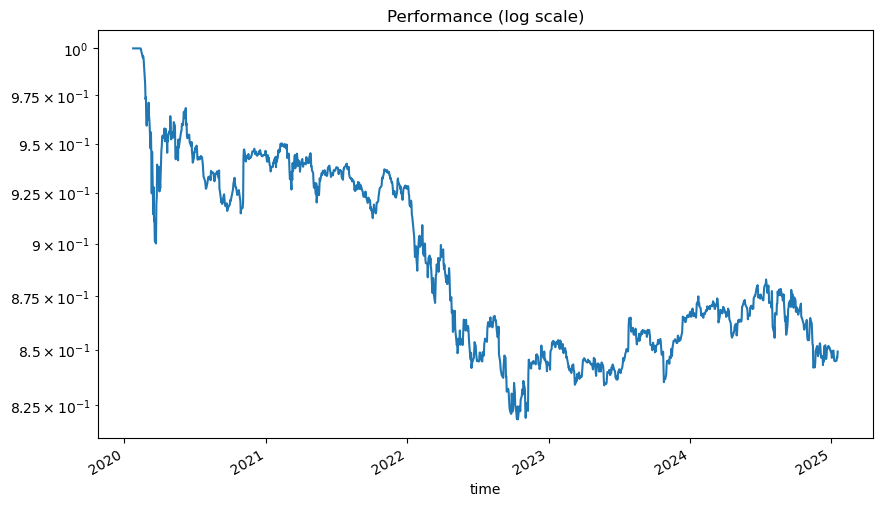

Sharpe Ratio: <xarray.DataArray (time: 1254, field: 11)> Size: 110kB
array([[             nan,              nan,              nan, ...,
                     nan,              nan,              nan],
       [             inf,              nan,              nan, ...,
         1.74745022e+180,  1.03141508e+005,              nan],
       [             inf,              nan,              nan, ...,
         2.72315761e+190,  1.37318858e+008,              nan],
       ...,
       [ 3.38278346e+069, -5.28285974e-001,  3.15341368e+008, ...,
                     inf,  5.49574895e+015,  9.69660501e+142],
       [ 3.36721234e+069, -5.29403458e-001,  3.14546282e+008, ...,
                     inf,  5.50098780e+015,  9.75393476e+142],
       [ 3.35291794e+069, -5.18780558e-001,  3.13754189e+008, ...,
                     inf,  5.50624265e+015,  9.81128099e+142]])
Coordinates:
  * time     (time) datetime64[ns] 10kB 2020-01-24 2020-01-27 ... 2025-01-17
  * field    (field) object 88B 'equity' ... 'av

/usr/local/lib/python3.10/site-packages/xarray/core/computation.py:821: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/site-packages/xarray/core/computation.py:821: RuntimeWarning:

overflow encountered in power



In [4]:
np.seterr(divide="ignore")

# Cargar datos
assets = ['NAS:AAL', 'NAS:AAPL', 'NAS:ABNB', 'NAS:ACGL', 'NAS:ADBE', 'NAS:ADI', 'NAS:ADP',
 'NAS:ADSK', 'NAS:AEP', 'NAS:AKAM', 'NAS:ALGN', 'NAS:AMAT', 'NAS:AMD',
 'NAS:AMGN', 'NAS:AMZN', 'NAS:ANSS', 'NAS:APA', 'NAS:AVGO', 'NAS:AXON',
 'NAS:BIIB', 'NAS:BKNG', 'NAS:BKR', 'NAS:CDNS', 'NAS:CDW', 'NAS:CEG', 'NAS:CHRW']

#Estas son las 20 acciones analizadas, estas cubren diferentes campos, que varian entre mercados y que son las líderes del mercado, l

data = qndata.stocks.load_spx_data(tail=365 * 5, assets=assets)

print(data.coords["asset"].values)



# Función para generar características
def get_features(data):
    close = data.sel(field="close")
    high = data.sel(field="high")
    low = data.sel(field="low")

    trend = qnta.roc(qnta.lwma(close, 60), 1)
    macd_signal = qnta.macd(close)[1]
    volatility = qnta.tr(high, low, close) / close
    volatility_annual = volatility.rolling(time=250).std()
    stochastic_k, stochastic_d = qnta.stochastic(high, low, close, 14)
    rsi = qnta.rsi(close)
    log_price = np.log(close)

    #RSI y log price son dos nuevas variables que agregan mas datos a la apertura y la fuerza de un movimiento para poder ayudar a la predicción.

    features = xr.concat(
        [trend, macd_signal, volatility, volatility_annual, stochastic_d, rsi, log_price],
        pd.Index(["trend", "macd_signal", "volatility", "volatility_annual", "stochastic_d", "rsi", "log_price"], name="field"),
    )
    return features.transpose("time", "field", "asset")

my_features = get_features(data)
display(my_features.sel(field="trend").to_pandas())
# Target: subir o bajar
def get_target_classes(data):
    price = data.sel(field="close")
    future_price = qnta.shift(price, -1)
    return xr.where(future_price > price, 1, 0)

# Modelo basado en Random Forest
def get_model():
    return RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenamiento de modelos
def train_model(data):
    features = get_features(data)
    targets = get_target_classes(data)
    models = {}
    for asset in data.coords["asset"].values:
        target_asset = targets.sel(asset=asset).dropna(dim="time", how="any")
        features_asset = features.sel(asset=asset).dropna(dim="time", how="any")
        target_df, feature_df = xr.align(target_asset, features_asset, join="inner")
        if len(target_df.time) < 10:
            continue
        model = get_model()
        model.fit(feature_df.values, target_df.values)
        models[asset] = model
    return models

# Predicción de pesos
def predict_weights(models, data):
    features = get_features(data)
    weights = xr.zeros_like(data.sel(field="close"))
    for asset in data.coords["asset"].values:
        if asset in models:
            model = models[asset]
            features_asset = features.sel(asset=asset).dropna(dim="time", how="any")
            if len(features_asset.time) < 1:
                continue
            weights.loc[dict(asset=asset, time=features_asset.time.values)] = model.predict(features_asset.values)
    return weights

# Backtesting
weights = qnbt.backtest_ml(
    train                         = train_model,  # Función para entrenar modelos
    predict                       = predict_weights,  # Función para predecir pesos
    train_period                  = 2 * 365,  # Período de entrenamiento en días calendario
    retrain_interval              = 10 * 365,  # Intervalo de reentrenamiento en días calendario
    retrain_interval_after_submit = 1,  # Intervalo de reentrenamiento después de la evaluación
    predict_each_day              = False,  # No es necesario predecir todos los días
    competition_type              = "stocks_nasdaq100",  # Tipo de competencia
    lookback_period               = 365,  # Período de datos necesarios para generar la predicción
    start_date                    = "2005-01-01",  # Fecha de inicio del backtest
    analyze                       = True,  # Realizar análisis de resultados
    build_plots                   = True  # Generar gráficos
)

# Imprimir resultados básicos
print(weights)

result = weights


# Métricas y visualización
statistics = qnstats.calc_stat(data, result)  # Usar `result` correctamente
performance = statistics.to_pandas()["equity"]
performance.plot(logy=True, title="Performance (log scale)", figsize=(10, 6))
plt.show()

sharpe_ratio = qnstats.calc_sharpe_ratio_annualized(statistics)
print("Sharpe Ratio:", sharpe_ratio)

# Métricas del modelo
target = get_target_classes(data)
aligned_target, aligned_result = xr.align(target, result, join="inner")
r2 = r2_score(aligned_target.values.flatten(), aligned_result.values.flatten())
explained_var = explained_variance_score(aligned_target.values.flatten(), aligned_result.values.flatten())
mae = mean_absolute_error(aligned_target.values.flatten(), aligned_result.values.flatten())

print(f"R2: {r2}, Explained Variance: {explained_var}, MAE: {mae}")
print("done")

In [ ]:
#